In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### First we import the data and then we read about all the data types it contains

In [130]:
Raw_data = pd.read_csv("Raw_Housing_Prices.csv")

In [131]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

### get the descriptive statistics for all of the variables


In [132]:
Raw_data.describe(include = "all")

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,21613,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,19489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


### We will treat the dataset to be free from outliers as it can affect the predictive power of our model

<AxesSubplot:xlabel='Sale Price'>

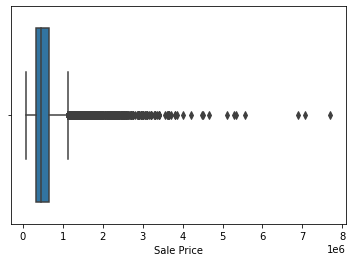

In [133]:
#lets see the outliers
sns.boxplot( x = Raw_data["Sale Price"])

In [134]:
q1 = Raw_data['Sale Price'].quantile(0.25)
q3 = Raw_data['Sale Price'].quantile(0.75)
Iqr = q3 - q1
upper_limit = q3 +1.5*Iqr
lower_limit = q1 -1.5*Iqr

def imputer_limit(value):
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value

In [135]:
Raw_data['Sale Price'] =  Raw_data['Sale Price'].apply(imputer_limit)
Raw_data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

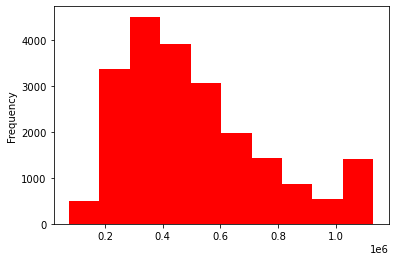

In [136]:
Raw_data['Sale Price'].plot.hist(color  = "red")

In [137]:
#checking for missing values
Raw_data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [138]:
#deleting all the null values in sale price
Raw_data = Raw_data.dropna(subset = ["Sale Price"],axis=0)
Raw_data["Sale Price"].isnull().sum()

0

In [139]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

### Now we will impute the numerical values of the dataset

In [140]:
numerical_columns_to_impute = ['No of Bathrooms','Flat Area (in Sqft)','Flat Area (in Sqft)','Area of the House from Basement (in Sqft)','Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)',"Lot Area (in Sqft)"]

In [141]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='median') 
Raw_data[numerical_columns_to_impute] = imputer.fit_transform(Raw_data[numerical_columns_to_impute])

In [142]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

### We will also treat the zipcode by transforming it as it is categorical

In [143]:
column1 = Raw_data['Zipcode'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
Raw_data['Zipcode'] = imputer.fit_transform(column1)
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

### checking for other transformations


In [144]:
Raw_data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [145]:
mapping = {'None':"0","Once": "1","Twice":"2","Thrice":"3","Four":"4"}
Raw_data["No of Times Visited"] =Raw_data["No of Times Visited"].map(mapping)
Raw_data["No of Times Visited"].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

### we do some more transformation of the data set like simplifying the contents of the column renovated year and date of house sold without losing information


In [146]:
Raw_data["Ever Renovated"] = np.where(Raw_data["Renovated Year"] == 0,"No","Yes")
Raw_data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [147]:
Raw_data["Sale Year"] = pd.DatetimeIndex(Raw_data["Date House was Sold"]).year
Raw_data["Years since Renovation"] = np.where(Raw_data["Ever Renovated"]=="Yes",abs(Raw_data["Sale Year"]-Raw_data["Renovated Year"]),0)

In [148]:
Raw_data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Sale Year,Years since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


### we delete the redundant variables 

In [149]:
Raw_data.drop(columns=["Renovated Year","Date House was Sold","Sale Year"],inplace=True)

In [150]:
Raw_data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [151]:
# the id column also should be deleted as it doesn't provide any valuable info
Raw_data.drop(columns="ID",inplace = True)

In [152]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

### visualsing categorical variables and transforming them to numerical variables for better training

In [153]:
Raw_data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

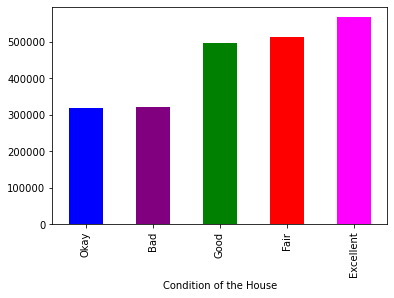

In [154]:
Raw_data.groupby("Condition of the House",)["Sale Price"].mean().sort_values().plot(kind="bar",color = {"blue","red","green","purple","magenta"})

In [155]:
Raw_data["Waterfront View"] = Raw_data["Waterfront View"].map({ 'No':0,
   'Yes':1
})
Raw_data['Condition of the House'] = Raw_data['Condition of the House'].map({'Bad':1,'Okay':2,'Fair':3,'Good':4,'Excellent':5
})

Raw_data['Ever Renovated'] = Raw_data['Ever Renovated'].map({
    'No':0,
    'Yes':1
})


### We intuitively know that zipcode does play a factor on house price and so we will bin it


In [156]:
Zip_Table= Raw_data.groupby("Zipcode").agg({"Sale Price":"mean"}).sort_values("Sale Price",ascending=True)
Zip_Table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [157]:
Zip_Table["Zipcode_Group"] = pd.cut(Zip_Table["Sale Price"],bins=10,labels=["Zipcode_Group_0","Zipcode_Group_1","Zipcode_Group_2","Zipcode_Group_3","Zipcode_Group_4","Zipcode_Group_5","Zipcode_Group_6","Zipcode_Group_7","Zipcode_Group_8","Zipcode_Group_9"],include_lowest=True)

In [158]:
Zip_Table=Zip_Table.drop(columns="Sale Price")

In [159]:
Transformed_Data = pd.merge(Raw_data,Zip_Table,left_on="Zipcode",how="left",right_index=True)
Transformed_Data = Transformed_Data.drop(columns="Zipcode")

In [160]:

Transformed_Data = pd.get_dummies(Transformed_Data,columns=["Zipcode_Group"],drop_first=True)

In [161]:
Transformed_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  int64  
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

### splitting of data set

In [162]:
X = Transformed_Data.drop(columns= ["Sale Price"])
Y = Transformed_Data["Sale Price"]

In [163]:
Transformed_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  int64  
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

### visualising and removing skewness from the numerical datas

In [164]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*4,4), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [165]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years since Renovation']

In [166]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

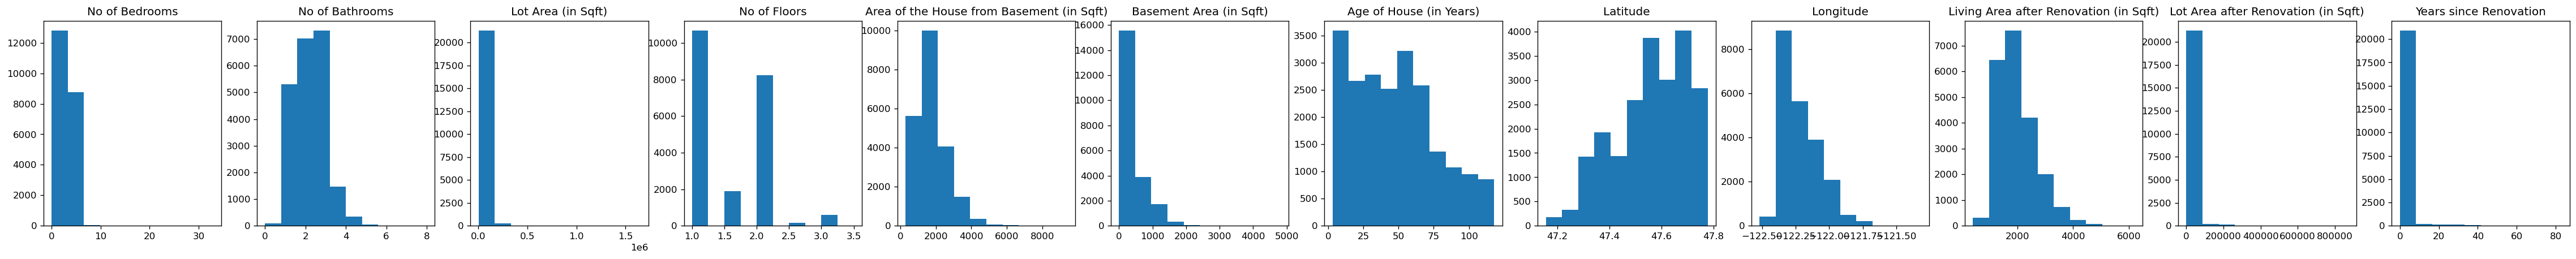

In [167]:
distribution(X, numerical_columns)

### Right skewness is prevalent more so we need to remove it

In [168]:
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years since Renovation']

In [169]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

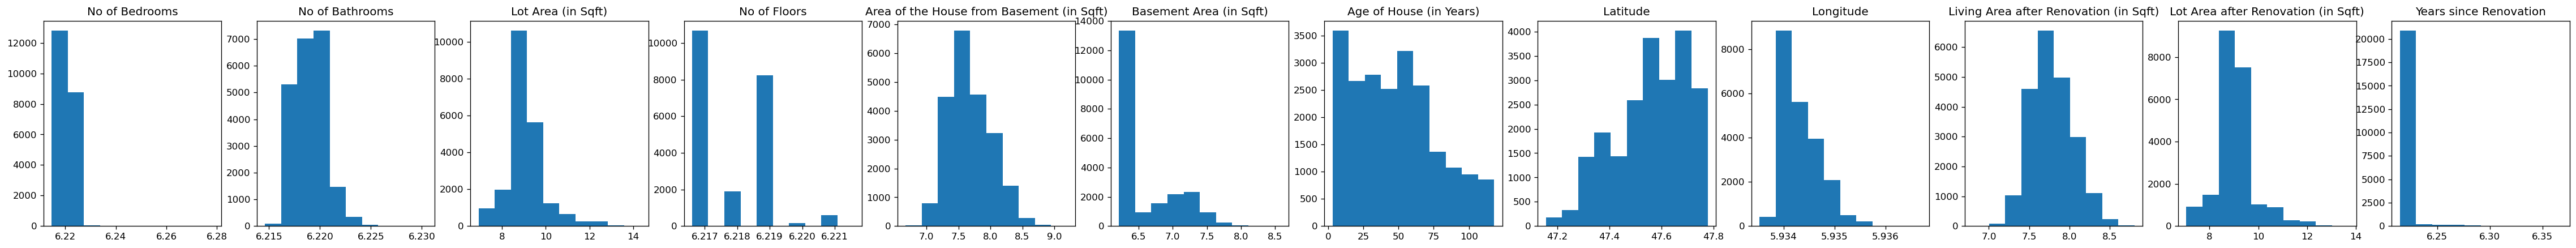

In [170]:
distribution(X, numerical_columns)

### Scaling the dataset and removing multi collinearity (ideally those with values greater than 0.5)

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = Transformed_Data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Years since Renovation,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.767588,...,-0.168911,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.642025,...,4.827106,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-1.618851,...,-0.168911,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,-1.012639,...,-0.168911,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,0.025117,...,-0.168911,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [172]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Years since Renovation,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.516645,0.577469,0.175425,0.175995,-0.006617,0.079649,0.028514,0.349933,0.509475,...,-0.006734,-0.010565,-0.039396,-0.074396,0.024514,0.019485,0.090274,0.016703,0.102859,0.035737
No of Bathrooms,0.516645,1.000000,0.754415,0.105010,0.500980,0.063683,0.187657,-0.124874,0.635778,0.696041,...,0.004644,-0.032762,-0.081490,-0.034477,0.084113,0.052795,0.123241,0.037718,0.109942,0.067747
Flat Area (in Sqft),0.577469,0.754415,1.000000,0.341571,0.354268,0.103841,0.284678,-0.058922,0.705725,0.853690,...,0.024552,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.175425,0.105010,0.341571,1.000000,-0.218404,0.074316,0.121698,0.066113,0.165808,0.319715,...,0.033036,0.024149,0.085244,-0.183542,-0.027075,0.046547,-0.011813,-0.078477,0.075148,0.037108
No of Floors,0.175995,0.500980,0.354268,-0.218404,1.000000,0.023721,0.029503,-0.263676,0.461442,0.548408,...,-0.000379,-0.003375,-0.067900,0.079146,0.071809,0.009219,0.069868,0.064986,-0.008630,0.005873
Waterfront View,-0.006617,0.063683,0.103841,0.074316,0.023721,1.000000,0.401856,0.016650,0.070332,0.063294,...,0.105822,-0.016847,0.039995,-0.017093,-0.010197,-0.005600,0.009136,-0.009788,0.027633,0.006933
No of Times Visited,0.079649,0.187657,0.284678,0.121698,0.029503,0.401856,1.000000,0.045978,0.223661,0.161106,...,0.094621,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Condition of the House,0.028514,-0.124874,-0.058922,0.066113,-0.263676,0.016650,0.045978,1.000000,-0.143747,-0.153588,...,-0.012115,-0.023685,-0.005263,-0.004704,-0.040471,0.018149,0.040030,0.018507,0.057929,0.005220
Overall Grade,0.349933,0.635778,0.705725,0.165808,0.461442,0.070332,0.223661,-0.143747,1.000000,0.723789,...,-0.023473,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.509475,0.696041,0.853690,0.319715,0.548408,0.063294,0.161106,-0.153588,0.723789,1.000000,...,0.013457,-0.019673,-0.055546,-0.097772,0.092118,0.058634,0.125459,0.029945,0.127926,0.069765


In [173]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

### calculating the VIF 

In [174]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X[:]
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.743570
No of Bathrooms                               3.434533
Flat Area (in Sqft)                          21.769570
Lot Area (in Sqft)                            6.885744
No of Floors                                  2.435679
Waterfront View                               1.212676
No of Times Visited                           1.416910
Condition of the House                        1.255685
Overall Grade                                 3.101478
Area of the House from Basement (in Sqft)    23.547182
Basement Area (in Sqft)                       6.634131
Age of House (in Years)                       2.624234
Latitude                                      2.457987
Longitude                                     1.814729
Living Area after Renovation (in Sqft)        2.997525
Lot Area after Renovation (in Sqft)           6.643101
Ever Renovated                                3.029876
Years since Renovation                        2.874180
Zipcode_Gr

In [175]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [115]:
for i in range(7):
  vif_data = MC_remover(vif_data)
vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Latitude,...,Years since Renovation,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.726332,0.544734,-0.352576,...,-0.168911,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.538457,0.680915,1.161645,...,4.827106,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-0.726332,1.293731,1.283619,...,-0.168911,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,1.504500,0.204281,-0.283288,...,-0.168911,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,-0.726332,-0.544715,0.409587,...,-0.168911,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### making this the new X data

In [116]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.510081
 No of Bathrooms                           2.960501
 No of Floors                              2.224729
 Waterfront View                           1.210882
 No of Times Visited                       1.411317
 Condition of the House                    1.248441
 Overall Grade                             2.696057
 Basement Area (in Sqft)                   1.649808
 Age of House (in Years)                   2.537683
 Latitude                                  2.456676
 Longitude                                 1.776347
 Living Area after Renovation (in Sqft)    2.570480
 Lot Area after Renovation (in Sqft)       1.646210
 Ever Renovated                            3.024617
 Years since Renovation                    2.871019
 Zipcode_Group_Zipcode_Group_1             1.538124
 Zipcode_Group_Zipcode_Group_2             2.563340
 Zipcode_Group_Zipcode_Group_3             2.851134
 Zipcode_Group_Zipcode_Group_4             3.232047
 Zipcode_Gro

In [117]:
X = vif_data[:]

In [118]:
Y =Transformed_Data['Sale Price']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 24), (6483, 24), (15126,), (6483,))

### The training of the model

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

c:\Users\argha\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [121]:
lr.coef_

array([  7708.80326316,  38764.76505907,  17845.58033007,  10985.97108252,
        29457.25178718,  11440.60570078,  82195.74474969,   6543.24818884,
        38749.80498773,  22020.6873052 , -18537.84819755,  37539.57086188,
        16809.52309346,  12803.71135475,  -8818.161452  ,  11298.00743202,
        33395.39559323,  60686.35341372,  77583.86579032,  49051.39456211,
        70200.92922787,  38827.91907792,  67577.32236958,  23284.95067818])

In [122]:
prediction = lr.predict(x_test)
lr.score(x_test,y_test)  

0.822093302087025

### Residuals plot

In [123]:
residuals = prediction - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':prediction})
residual_table = residual_table.sort_values( by = 'predictions')

In [124]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

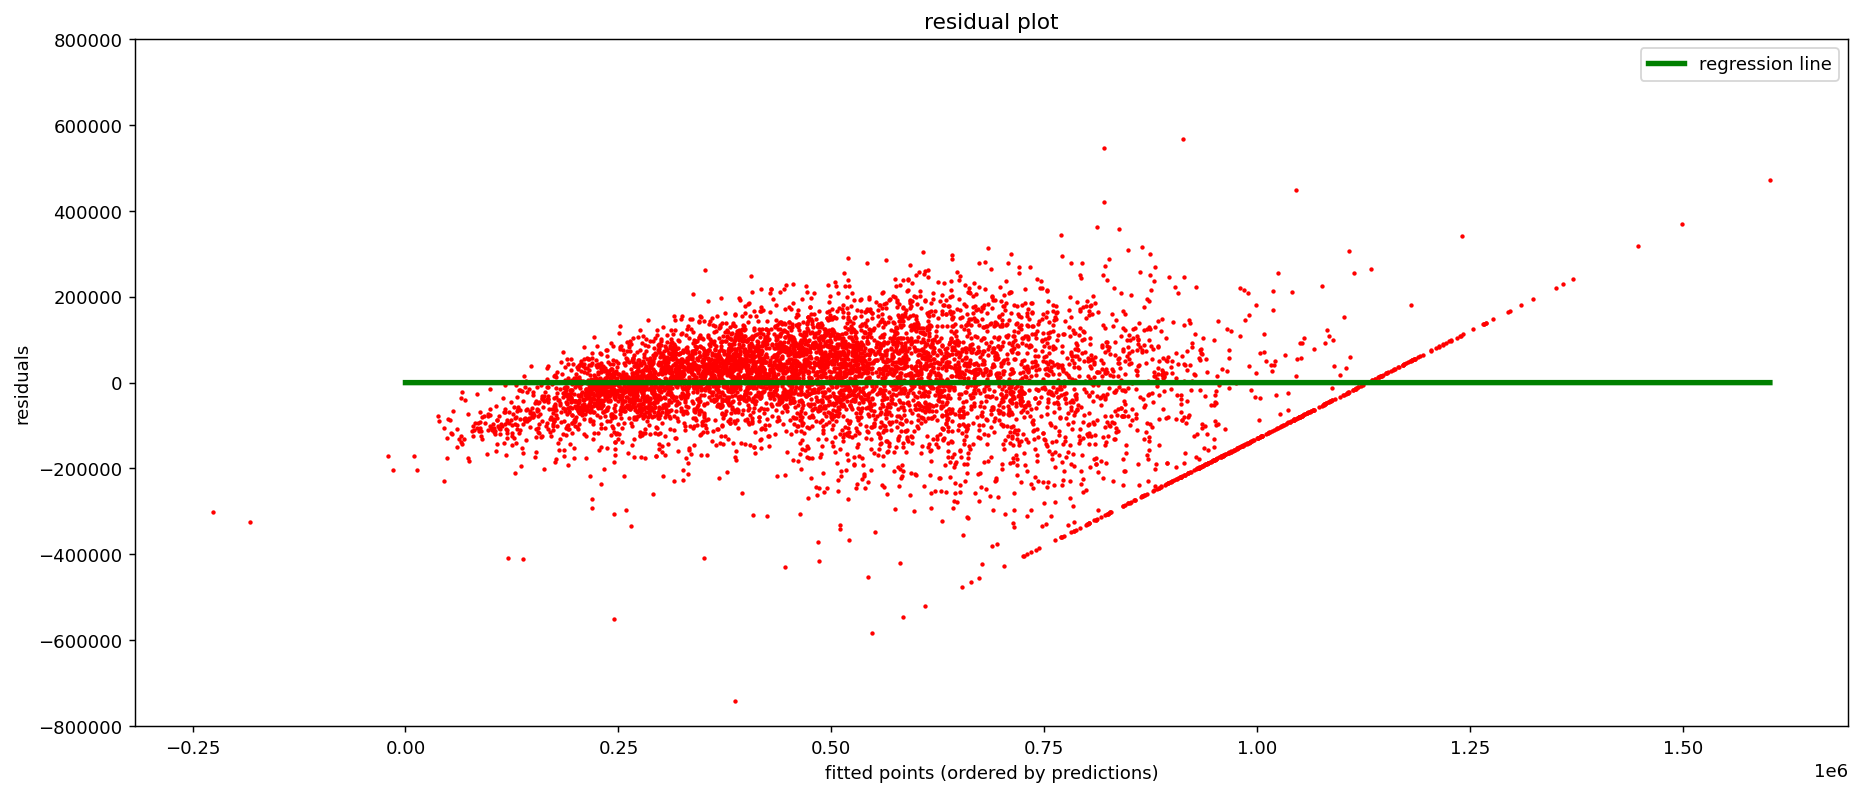

In [125]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

### Distribution of Errors

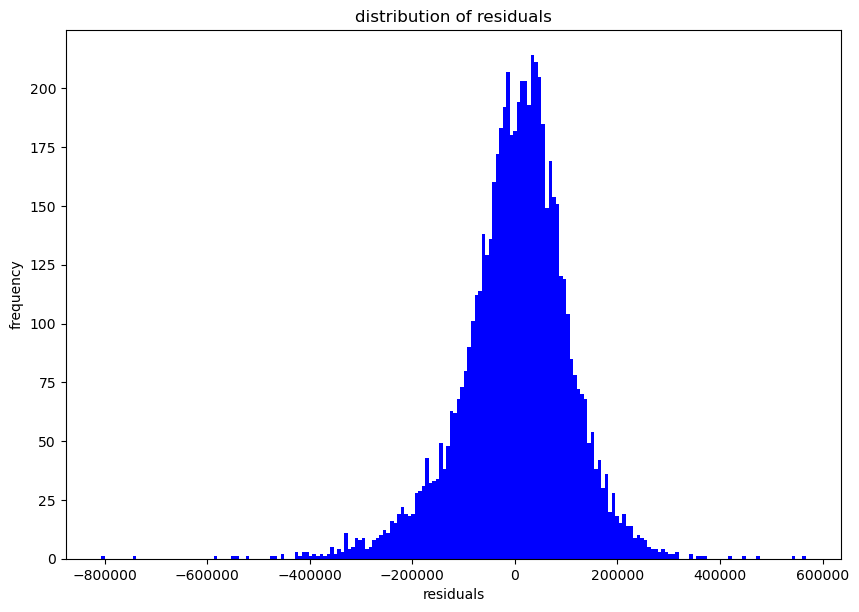

In [126]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residuals'],color='blue',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show() 

### Model Coefficients

In [127]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

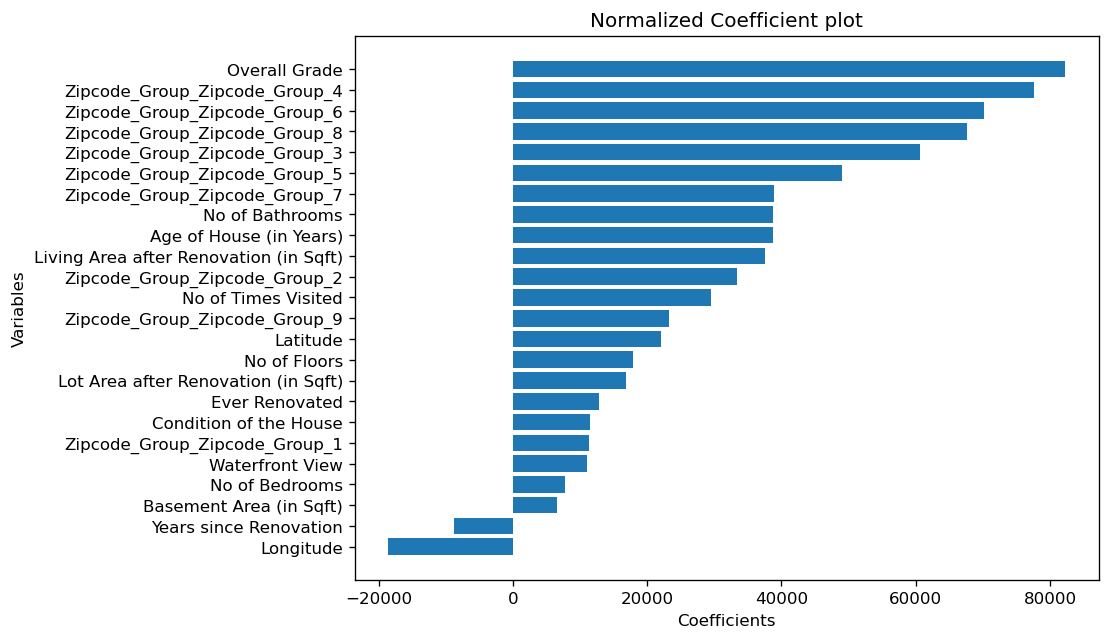

In [128]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()